# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh) и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [2]:
data = pd.read_table('orange_small_churn_data.train', sep = ',')
labels = pd.read_table('orange_small_churn_labels.train', header = None, squeeze = True)
data['label'] = labels

2\. Рассчитайте доли классов `отток` и `не отток`.

In [3]:
data.label.value_counts(normalize = True)

-1    0.925725
 1    0.074275
Name: label, dtype: float64

3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Для анализа корреляции выберем только те числовые переменные, в которых есть хотя бы одно значение, не равное NaN.

In [4]:
not_null_numeric_columns = np.array(data.ix[:, :190].columns[pd.notnull(data.ix[:, :190]).any()])
not_null_numeric_columns

array(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var9',
       'Var10', 'Var11', 'Var12', 'Var13', 'Var14', 'Var16', 'Var17',
       'Var18', 'Var19', 'Var21', 'Var22', 'Var23', 'Var24', 'Var25',
       'Var26', 'Var27', 'Var28', 'Var29', 'Var30', 'Var33', 'Var34',
       'Var35', 'Var36', 'Var37', 'Var38', 'Var40', 'Var41', 'Var43',
       'Var44', 'Var45', 'Var46', 'Var47', 'Var49', 'Var50', 'Var51',
       'Var53', 'Var54', 'Var56', 'Var57', 'Var58', 'Var59', 'Var60',
       'Var61', 'Var62', 'Var63', 'Var64', 'Var65', 'Var66', 'Var67',
       'Var68', 'Var69', 'Var70', 'Var71', 'Var72', 'Var73', 'Var74',
       'Var75', 'Var76', 'Var77', 'Var78', 'Var80', 'Var81', 'Var82',
       'Var83', 'Var84', 'Var85', 'Var86', 'Var87', 'Var88', 'Var89',
       'Var90', 'Var91', 'Var92', 'Var93', 'Var94', 'Var95', 'Var96',
       'Var97', 'Var98', 'Var99', 'Var100', 'Var101', 'Var102', 'Var103',
       'Var104', 'Var105', 'Var106', 'Var107', 'Var108', 'Var109',
       'Var110', '

In [5]:
correlations = data[not_null_numeric_columns].corrwith(data.label)
correlations

Var1     -0.002702
Var2     -0.017606
Var3     -0.028206
Var4     -0.025836
Var5     -0.003427
Var6     -0.001115
Var7      0.005457
Var9      0.023109
Var10    -0.012408
Var11     0.041105
Var12     0.030940
Var13    -0.004211
Var14    -0.028559
Var16    -0.024767
Var17    -0.018559
Var18    -0.016218
Var19    -0.035770
Var21    -0.005285
Var22    -0.005552
Var23    -0.022633
Var24    -0.002664
Var25    -0.005090
Var26     0.004346
Var27     0.027263
Var28     0.000536
Var29    -0.028665
Var30    -0.123758
Var33    -0.033901
Var34    -0.038425
Var35     0.004245
            ...   
Var157   -0.018375
Var158    0.029493
Var159   -0.056155
Var160   -0.006440
Var161    0.060306
Var162   -0.032572
Var163   -0.001742
Var164    0.030346
Var165    0.036349
Var166   -0.010075
Var168    0.060773
Var170   -0.024399
Var171    0.053023
Var172    0.022595
Var173   -0.000350
Var174    0.013811
Var176   -0.041387
Var177   -0.048415
Var178   -0.006336
Var179   -0.019906
Var180    0.020656
Var181   -0.

Как видим, есть как положительные, так и отрицательные корреляции - нужно сортировать корреляции по модулю.

4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

In [6]:
top20 = np.array(correlations.abs().sort_values(ascending = False)[:20].index)
top20

array(['Var30', 'Var62', 'Var92', 'Var87', 'Var186', 'Var130', 'Var168',
       'Var161', 'Var75', 'Var114', 'Var159', 'Var171', 'Var59', 'Var177',
       'Var84', 'Var154', 'Var61', 'Var176', 'Var11', 'Var121'], dtype=object)

Построим scatterplot для пар признаков. По диагонали отображается восстановленная плотность признака для разных классов.

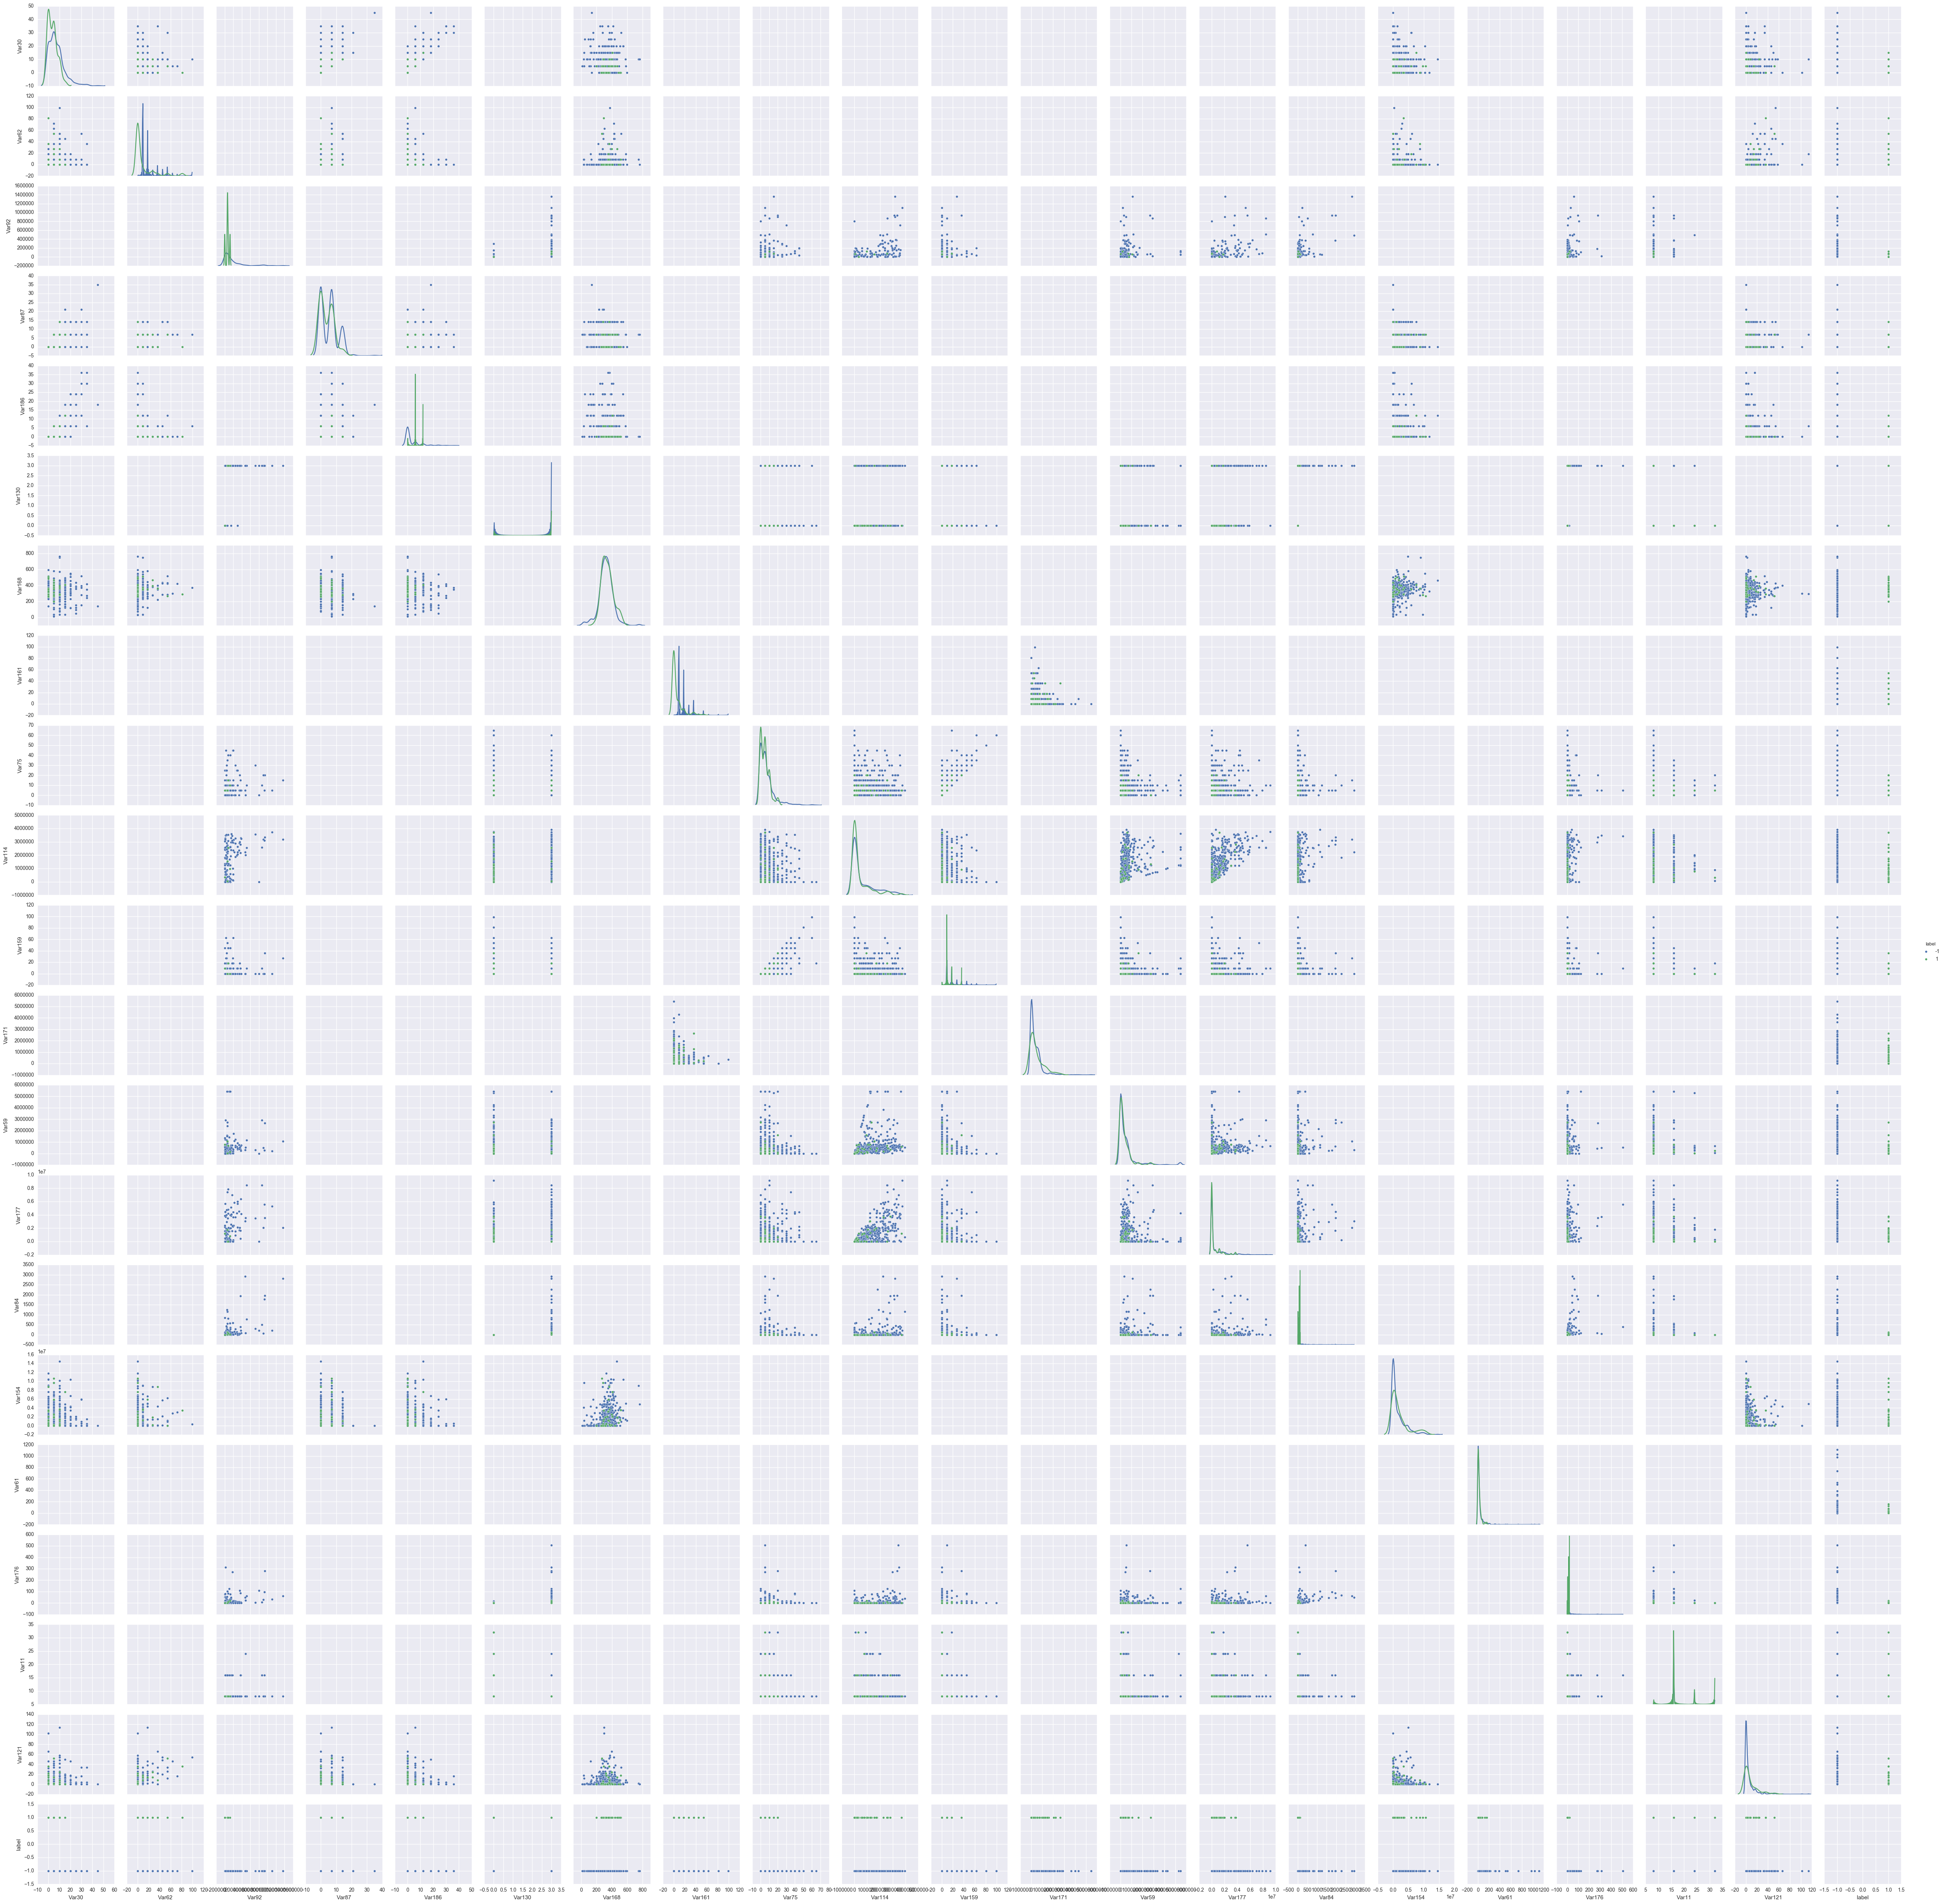

In [7]:
sns.pairplot(data[np.append(top20, 'label')], hue = 'label', diag_kind = 'kde')

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

In [8]:
np.random.seed(0)
random10 = np.random.choice(not_null_numeric_columns, size = 10, replace = False)
random10

array(['Var65', 'Var160', 'Var74', 'Var66', 'Var134', 'Var113', 'Var9',
       'Var171', 'Var143', 'Var101'], dtype=object)

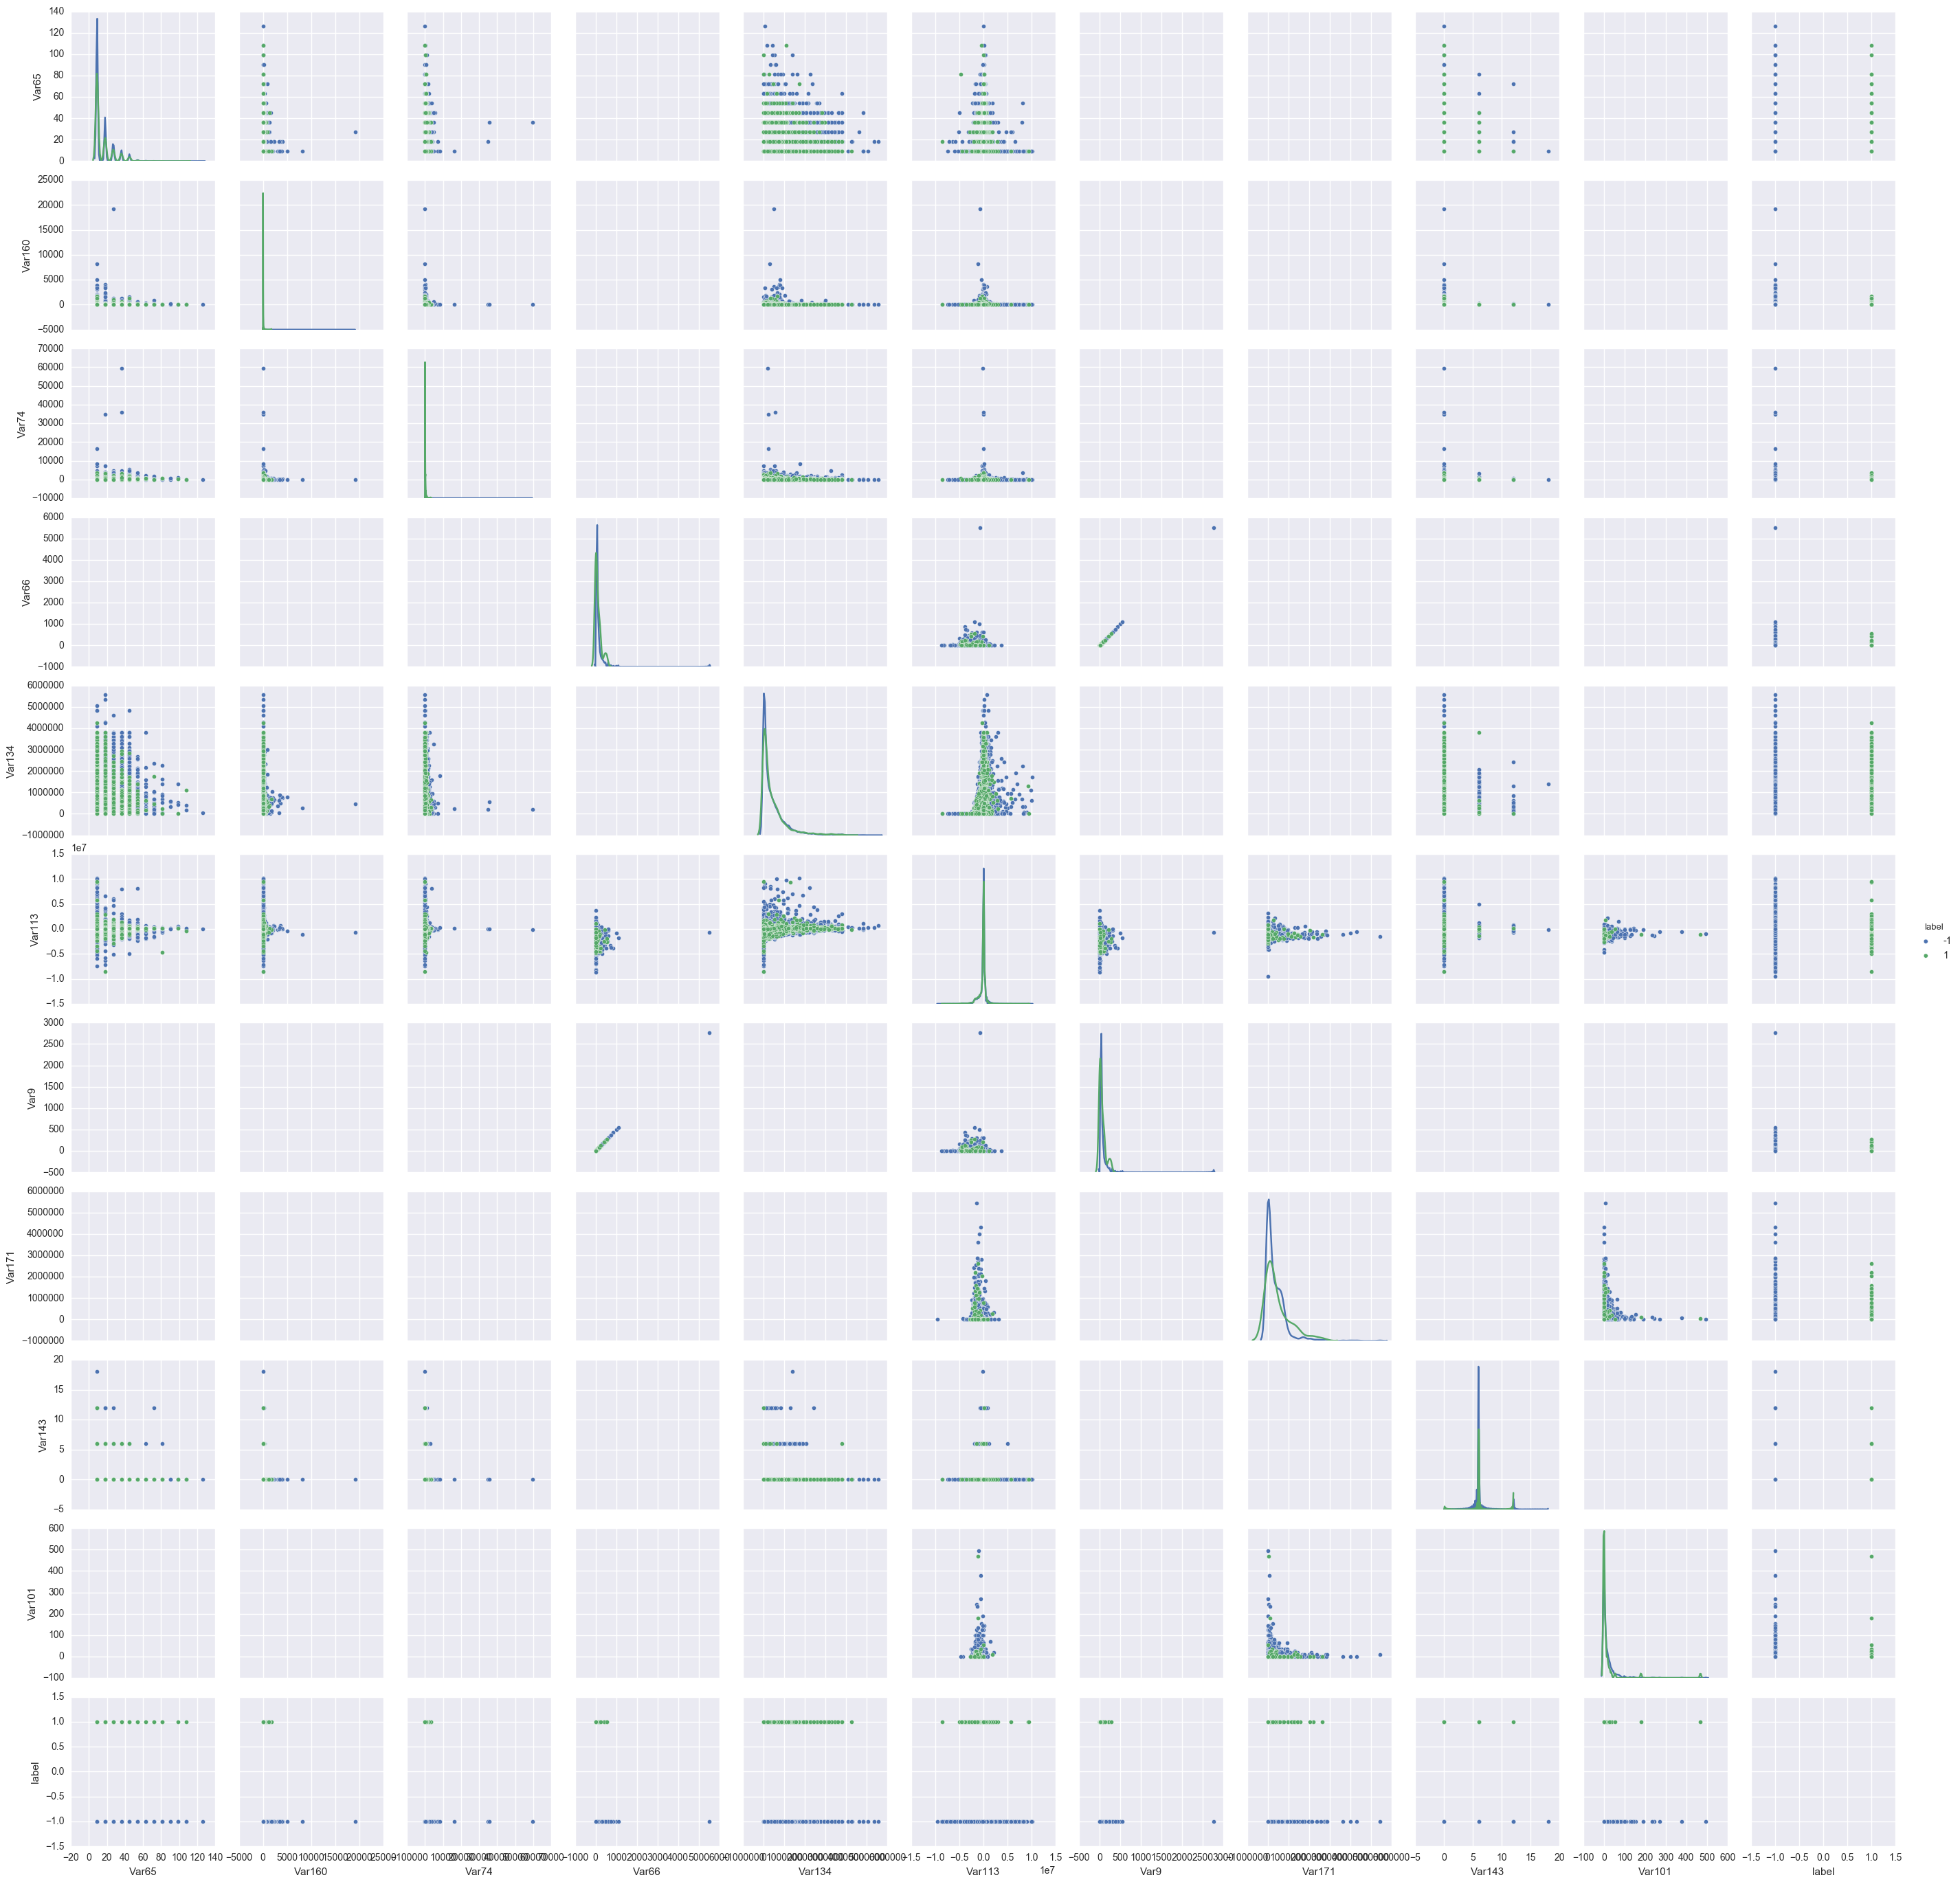

In [9]:
sns.pairplot(data[np.append(random10, 'label')], hue = 'label', diag_kind = 'kde')

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

In [10]:
bottom10 = np.array(correlations.abs().sort_values()[:10].index)
bottom10

array(['Var132', 'Var173', 'Var108', 'Var28', 'Var78', 'Var50', 'Var80',
       'Var60', 'Var94', 'Var189'], dtype=object)

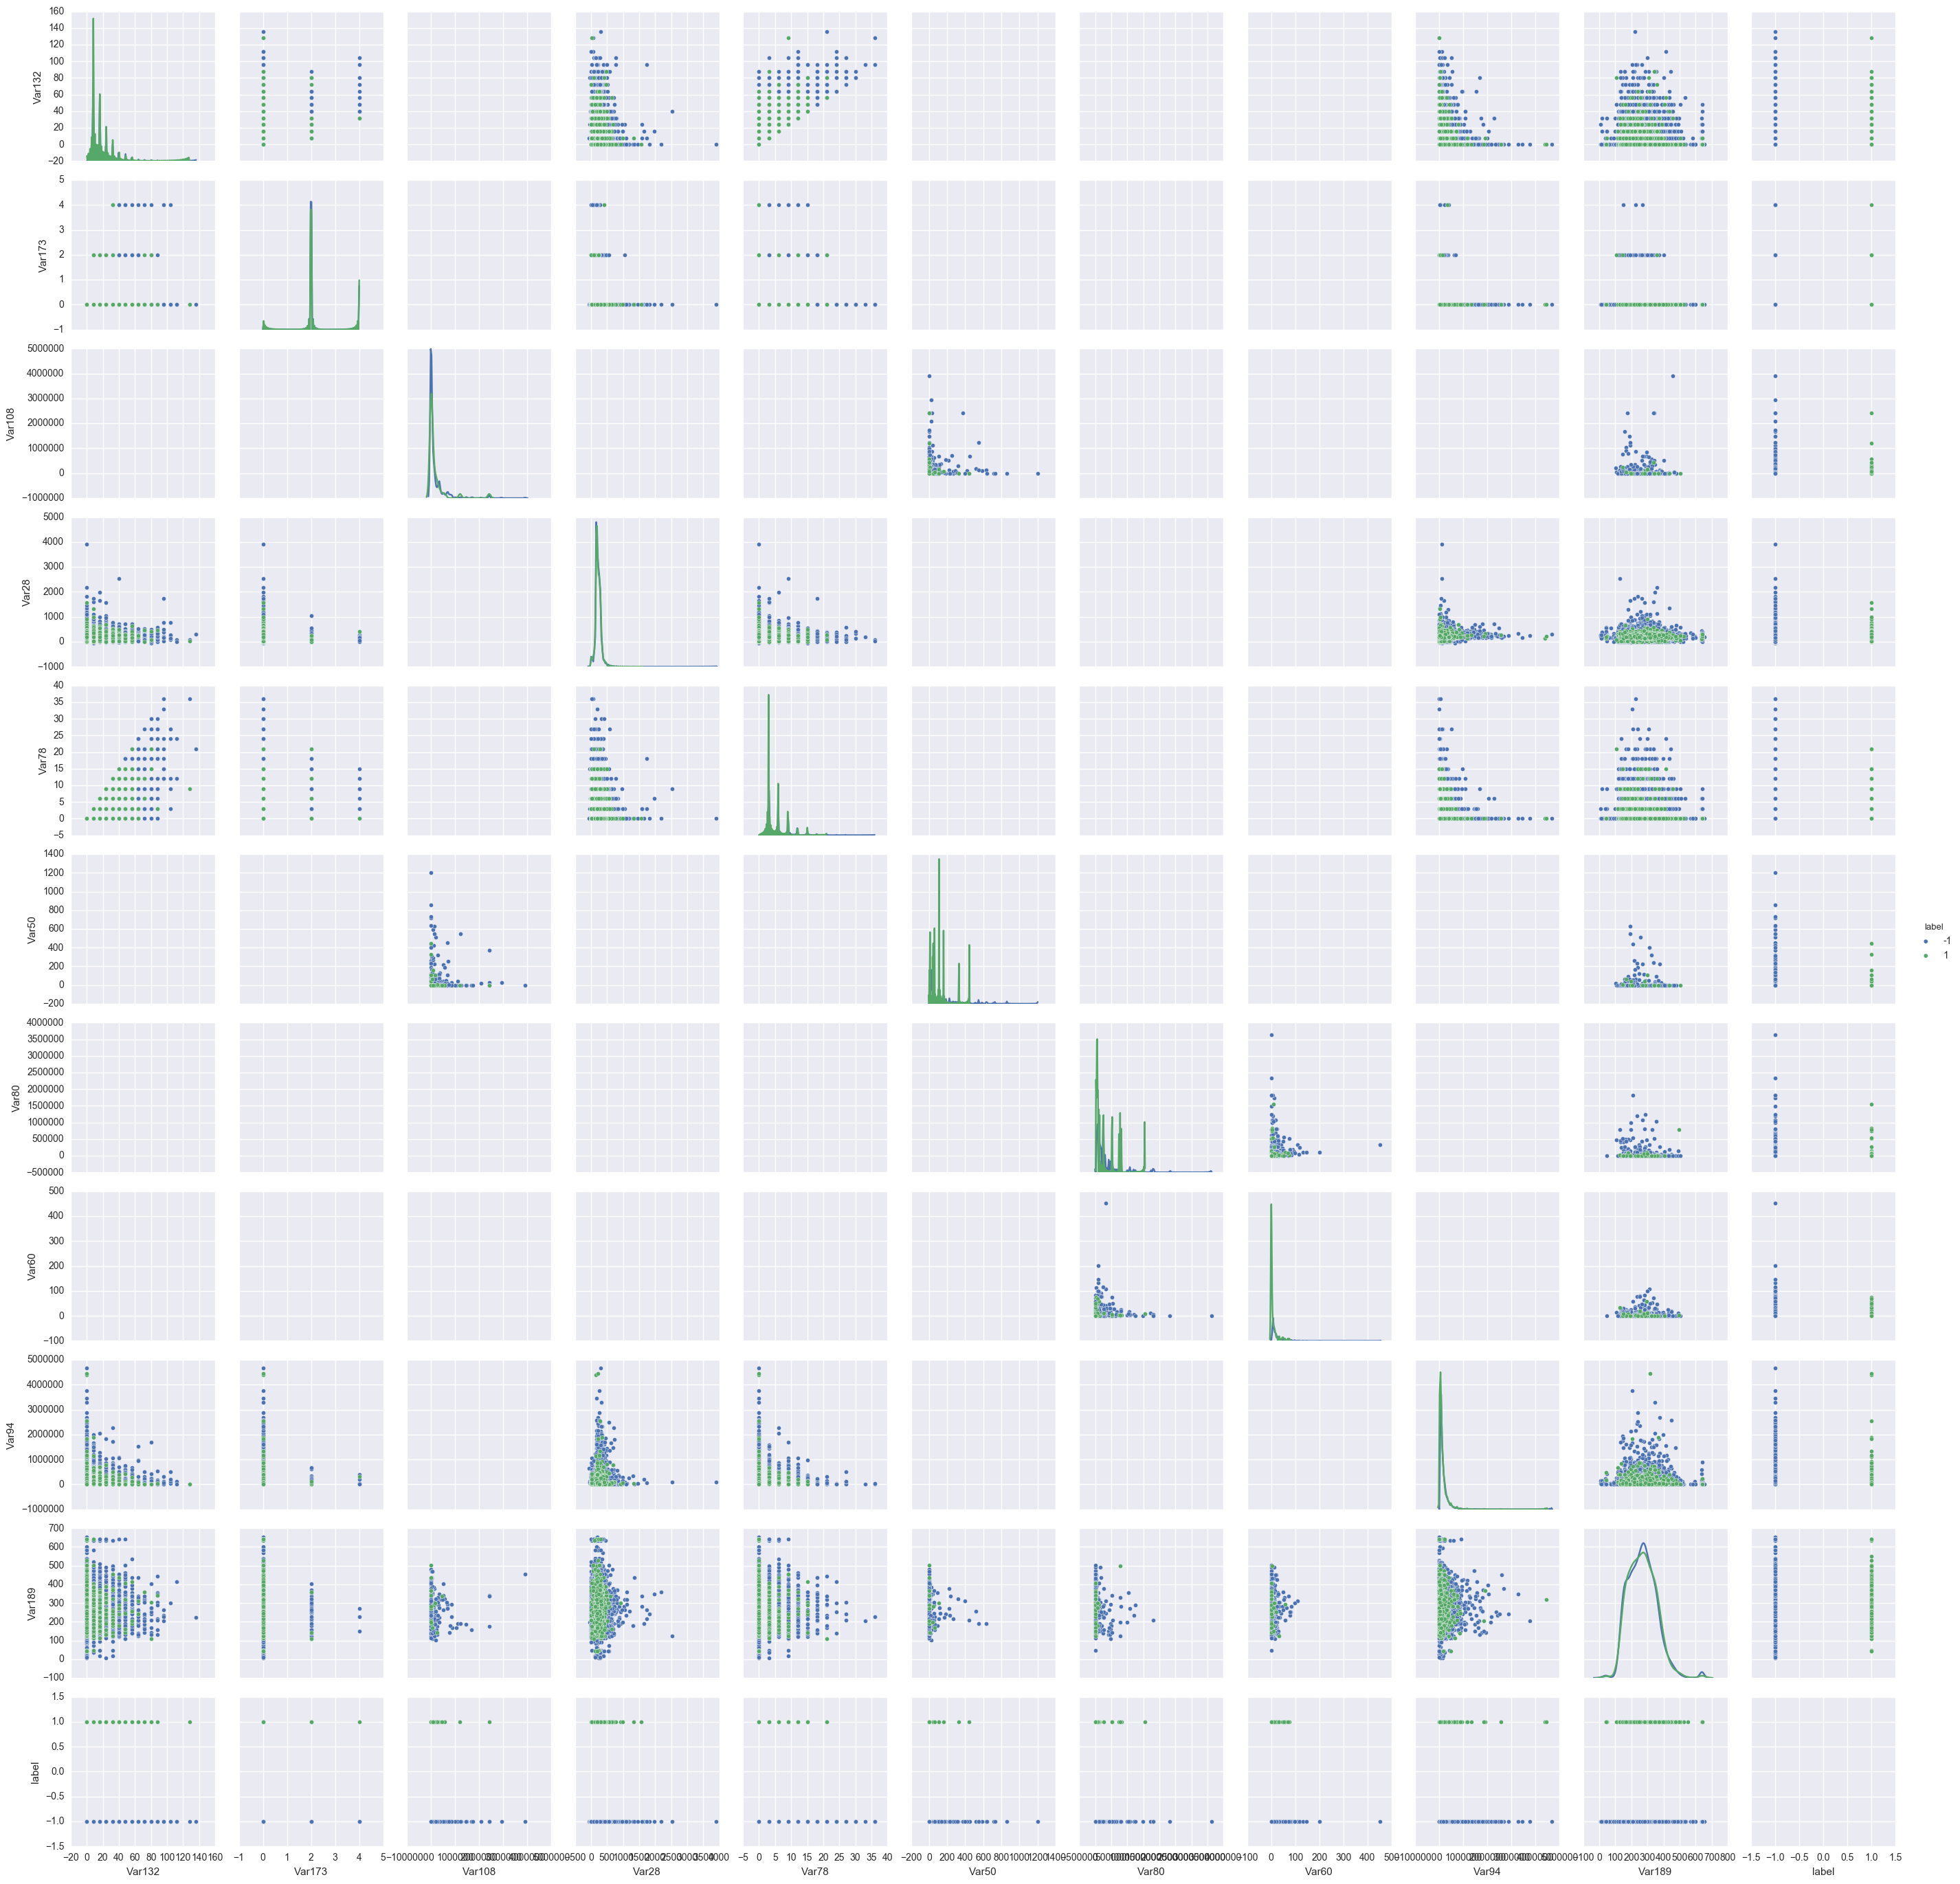

In [11]:
sns.pairplot(data[np.append(bottom10, 'label')], hue = 'label', diag_kind = 'kde')

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

Для построения гистограмм выберем только те категориальные переменные, в которых есть хотя бы одно значение, не равное NaN.

In [12]:
not_null_categorical_columns = np.array(data.ix[:, 190:230].columns[pd.notnull(data.ix[:, 190:230]).any()])
not_null_categorical_columns

array(['Var191', 'Var192', 'Var193', 'Var194', 'Var195', 'Var196',
       'Var197', 'Var198', 'Var199', 'Var200', 'Var201', 'Var202',
       'Var203', 'Var204', 'Var205', 'Var206', 'Var207', 'Var208',
       'Var210', 'Var211', 'Var212', 'Var213', 'Var214', 'Var215',
       'Var216', 'Var217', 'Var218', 'Var219', 'Var220', 'Var221',
       'Var222', 'Var223', 'Var224', 'Var225', 'Var226', 'Var227',
       'Var228', 'Var229'], dtype=object)

Для наглядности отобразим только те признаки, в которых не более десяти различных значений.

In [13]:
categorical_less_or_equal_10 = []
for var in not_null_categorical_columns:
    if len(data[var].unique()) <= 10:
        categorical_less_or_equal_10.append(var)
categorical_less_or_equal_10 = np.array(categorical_less_or_equal_10)
categorical_less_or_equal_10

array(['Var191', 'Var194', 'Var196', 'Var201', 'Var203', 'Var205',
       'Var208', 'Var210', 'Var211', 'Var213', 'Var215', 'Var218',
       'Var221', 'Var223', 'Var224', 'Var225', 'Var227', 'Var229'], 
      dtype='|S6')

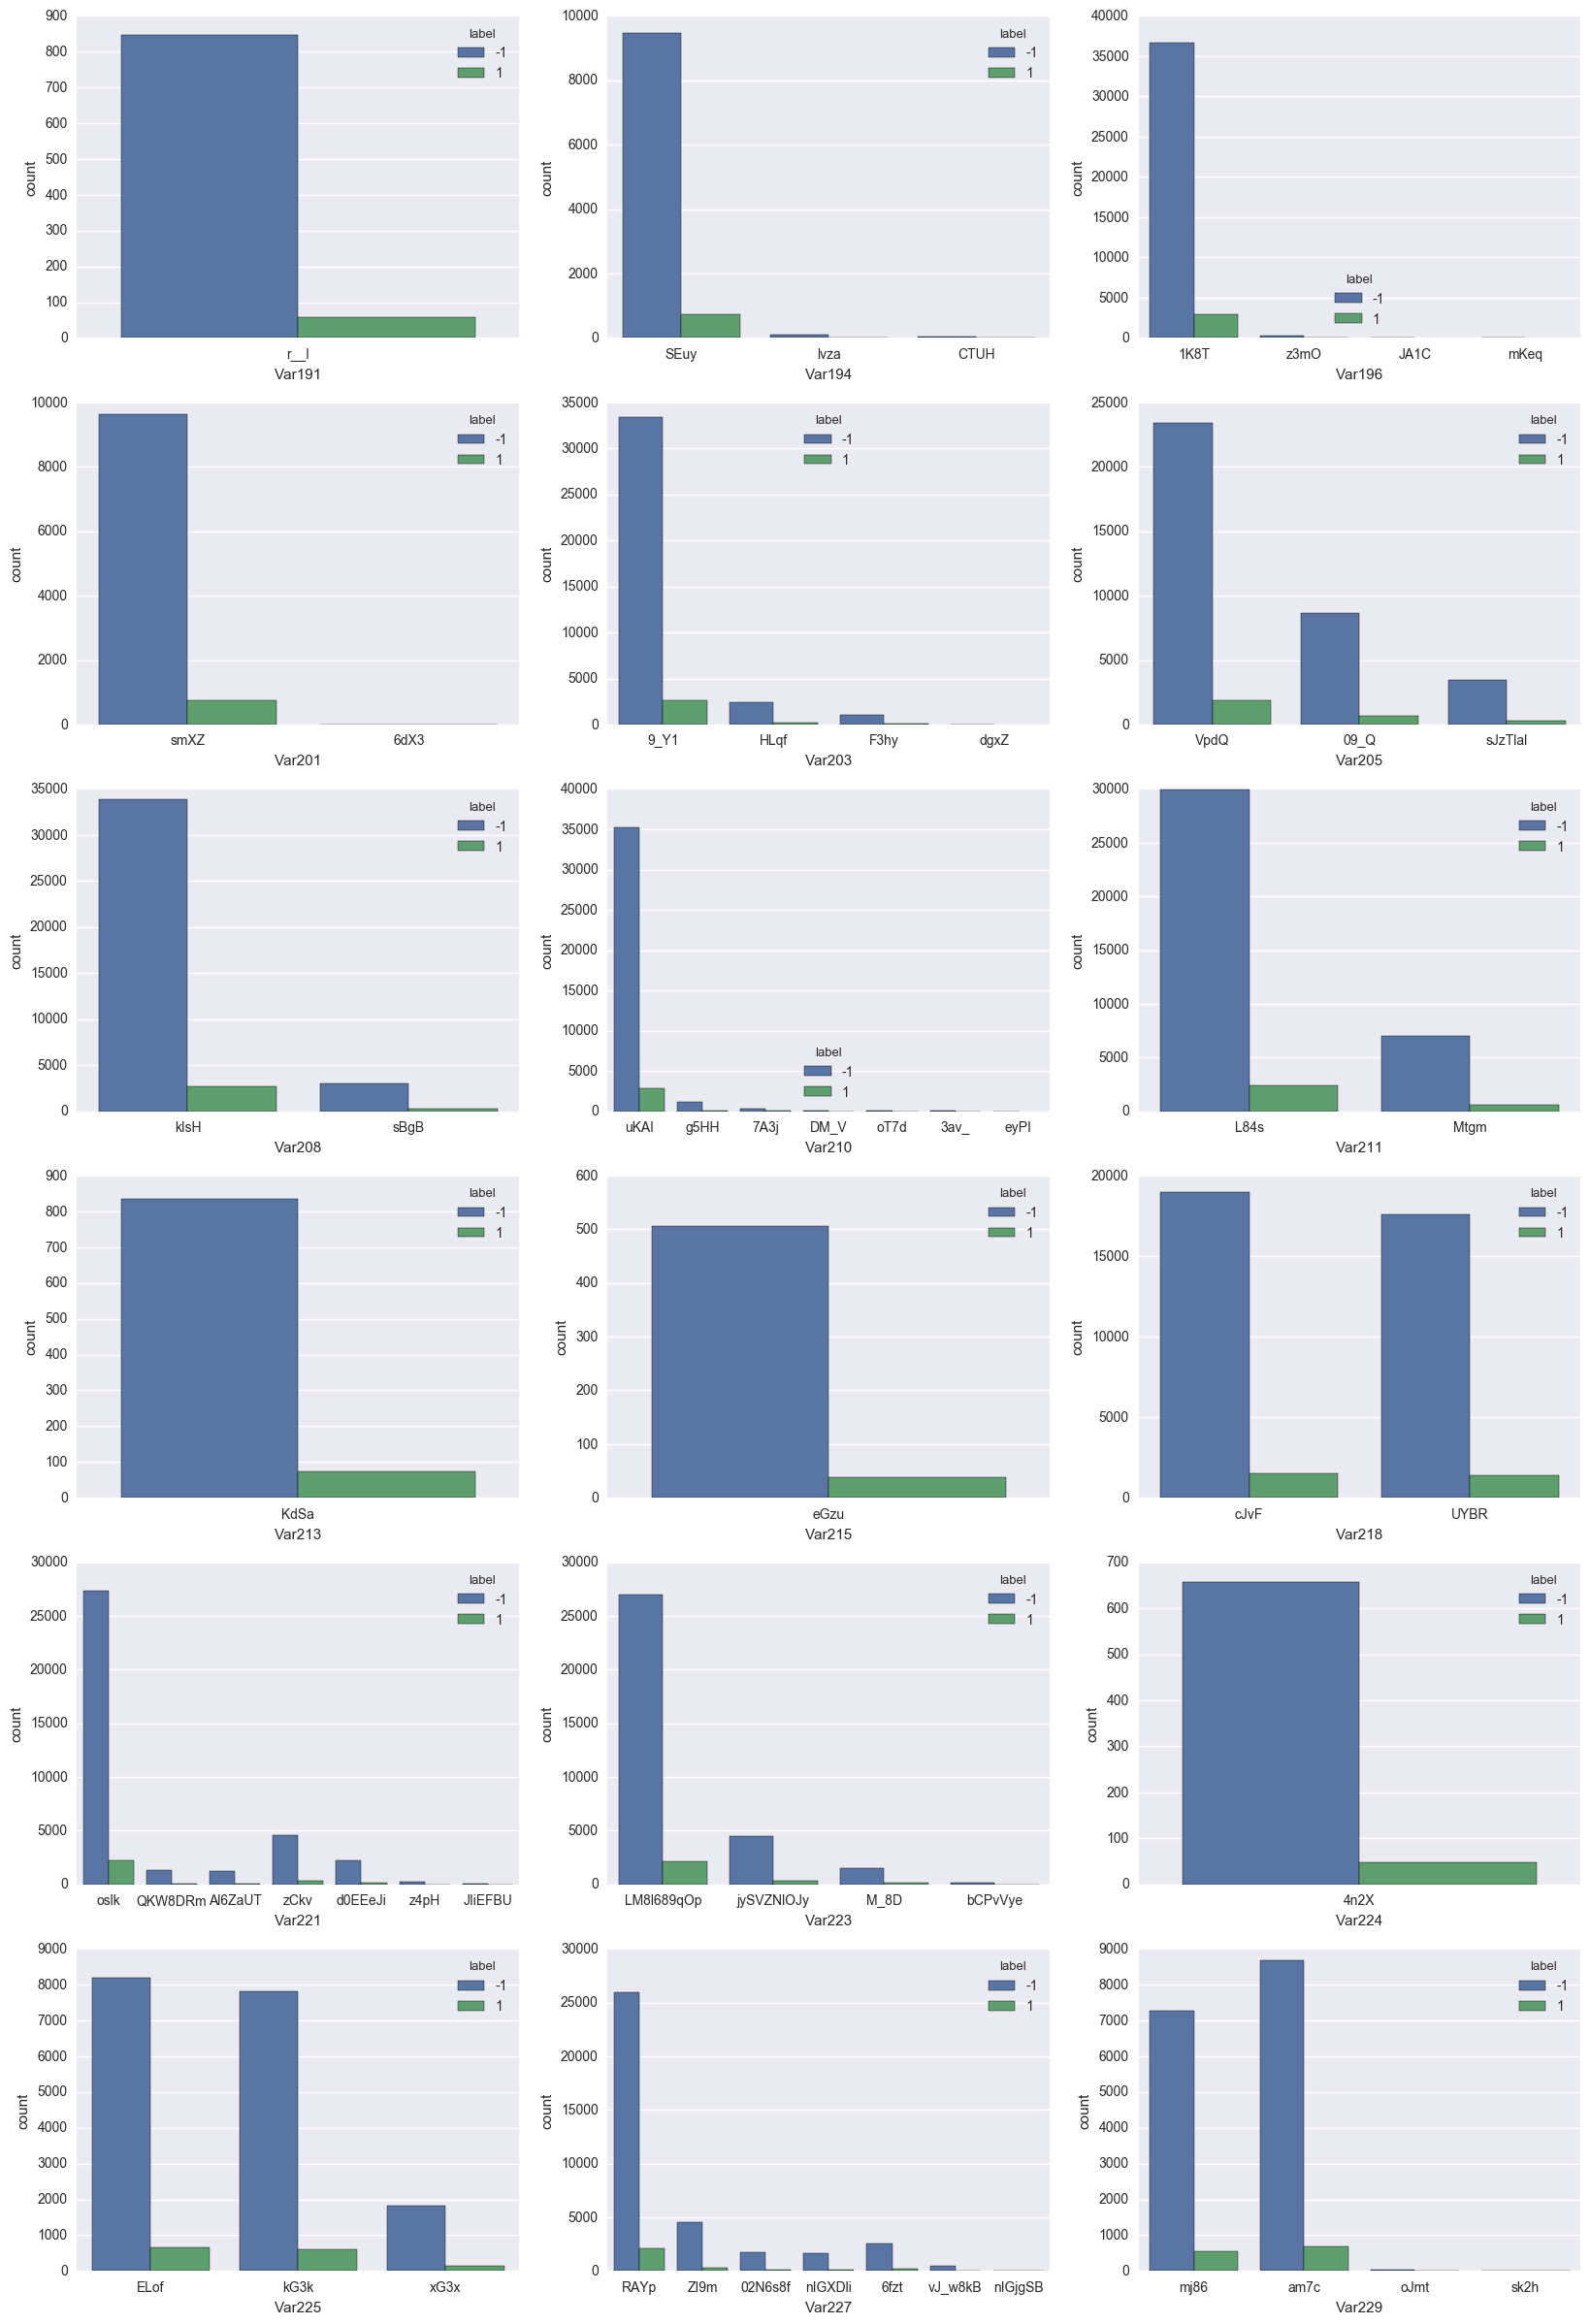

In [14]:
fig, axes = plt.subplots(6, 3, figsize = (20, 30))
for i, var in enumerate(categorical_less_or_equal_10):
    sns.countplot(x = var, data = data, ax = axes[i / 3, i % 3], hue = 'label')

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?

По графикам для числовых переменных видно, что распределения признаков, наиболее сильно коррелирующих с целевой функцией, отличаются для разных классов, в то время как для наименее сильно коррелирующих практичеки одинаковые. Это позволяет предположить, что признаки с сильной корреляцией внесут наибольший вклад в модель, в то время как со слабой корреляцией окажутся шумовыми. Для категориальных переменных наименее полезными окажутся признаки, принимающие лишь одно значение. Также и для числовых, и для категориальных признаков бесполезными являются те, значение которых везде равно NaN. Отбор признаков, безусловно, окажется полезным для построения модели.